In [1]:
import time
import numpy as np
import os
import json

from ase.io import read, write
from ase import Atoms
from ase.io import read, write
from ase.io import Trajectory
from reactML.common.pyscf2ase import ase_to_string, PySCF_calculator


In [2]:
import matplotlib.pyplot as plt
import matplotlib

font = {'weight': 'normal',
        'size': 25}
matplotlib.rc('font', **font)

In [3]:
def get_reaction_plot(compound_list, x_shift = 0, y_shift = 0 , color = 'blue', alpha = 1, 
                      distance = 0.05, marker = 'o', if_text = True):
    Gibbs_list = [Gibbs_dict[compound] for compound in compound_list]

    compound_list = [compound.replace('+LiF', '') for compound in compound_list]
    print(Gibbs_list)
    Gibbs_list = np.array(Gibbs_list) - np.array(Gibbs_list[0]) + y_shift

    # Create repeated values for step plot
    y = np.repeat(Gibbs_list, 2)

    x_label = compound_list.copy()
    x = np.arange(len(y)) + x_shift

    # Plot segments with different line styles based on value changes
    for i in range(0, len(y)-1):
        if y[i] == y[i+1]:
            # Same value - solid line
            plt.plot(x[i:i+2], y[i:i+2], color = color, linestyle = '-', linewidth=2, alpha = alpha)
        else:
            # Different value - dashed line
            plt.plot(x[i:i+2], y[i:i+2], color = color, linestyle = '--', linewidth=2, alpha = alpha)

    # Add points at the compound positions
    plt.scatter(x, y, s = 100, color = color, marker = 'o' , alpha = alpha)

    # Add text annotations above the solid line segments
    if if_text:
        for i in range(0, len(y)-1, 2):
            if y[i] == y[i+1]:
                plt.text(x[i] + 0.5, y[i] + distance, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=20)
                plt.text(x[i] + 0.5, y[i] - distance, f'{compound_list[i//2]}', ha='center', va='top', fontsize=20)



def get_ref_plot(compound_list, ref_Gibbs_list, x_shift = 0, y_shift = 0 , 
                 color = 'blue', alpha = 1, distance = 0.05, marker = 'o',
                 if_text = False):
    

    y = np.repeat(ref_Gibbs_list, 2)

    x_label = compound_list.copy()
    x = np.arange(len(y)) + x_shift

    # Plot segments with different line styles based on value changes
    for i in range(0, len(y)-1):
        if y[i] == y[i+1]:
            # Same value - solid line
            plt.plot(x[i:i+2], y[i:i+2], color = color, linestyle = '-', linewidth=2, alpha = alpha)
        else:
            # Different value - dashed line
            plt.plot(x[i:i+2], y[i:i+2], color = color, linestyle = '--', linewidth=2, alpha = alpha)

    # Add points at the compound positions
    plt.scatter(x, y, s = 100, color = color, marker = marker , alpha = alpha)

    # Add text annotations above the solid line segments

    if if_text:
        for i in range(0, len(y)-1, 2):
            if y[i] == y[i+1]:
                plt.text(x[i] + 0.5, y[i] + distance, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=20)
                plt.text(x[i] + 0.5, y[i] - distance, f'{compound_list[i//2]}', ha='center', va='top', fontsize=20)


In [4]:
def read_thermo_analysis(file_name):
    with open(file_name, 'r') as fp:
        read_json = json.load(fp)

    # Extract individual Gibbs energy contributions
    G_elec = read_json['G_elec'][0]  # Electronic contribution
    # G_elec = read_json['metaGGA_single_point_energy'][0]

    G_trans = read_json['G_trans'][0]  # Translational contribution
    G_rot = read_json['G_rot'][0]     # Rotational contribution
    G_vib = read_json['G_vib'][0]     # Vibrational contribution

    # Check if G_rot is nan and assign zero if true
    if np.isnan(G_rot):
        G_rot = 0

    # Calculate total Gibbs free energy
    G_tot = G_elec + G_trans + G_rot + G_vib


    G_tot_Eh = G_tot # in Hartree
    G_tot_eV = G_tot_Eh * 27.2114 # in eV

    return read_json, G_tot_eV

def update_Gibbs_combo(Gibbs_dict, mol_1 = 'H2O', mol_2 = 'PF5'):
    Gibbs_dict.update({mol_1+'+'+mol_2: Gibbs_dict[mol_1] + Gibbs_dict[mol_2]})


In [5]:
json_name = 'thermo_analysis.json'

Gibbs_dict = {}

mol_name = 'H2O'
thermo_analysis, G_tot_eV = read_thermo_analysis(file_name= './structures/INPUT_'+mol_name+'.xyz/' + json_name)

Gibbs_dict[mol_name] = G_tot_eV


In [6]:
file_list = os.listdir('./structures/')
for file in file_list:
    if 'INPUT' in file:
        mol_name = file.split('_')[-1]
        mol_name = mol_name.split('.')[0]
        # print(mol_name)
        try:
            thermo_analysis, G_tot_eV = read_thermo_analysis(file_name= './structures/'+file+'/' + json_name)
            Gibbs_dict[mol_name] = G_tot_eV
        except:
            pass


[-30447.861095915538, -30446.51356131265, -30446.740763900663, -30447.45556050777]
[-30446.76560201746, -30445.519865788156, -30446.786416078612]


Text(0, 0.5, '$\\Delta G$ (eV)')

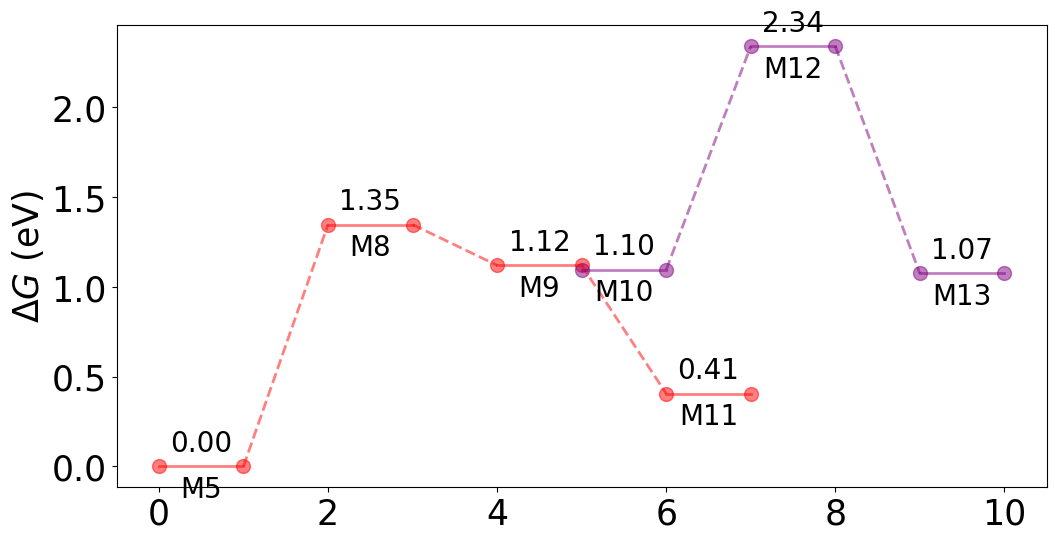

In [12]:

update_Gibbs_combo(Gibbs_dict, mol_1 = 'M9', mol_2 = 'LiF')
update_Gibbs_combo(Gibbs_dict, mol_1 = 'M10', mol_2 = 'LiF')
update_Gibbs_combo(Gibbs_dict, mol_1 = 'M11', mol_2 = 'LiF')
update_Gibbs_combo(Gibbs_dict, mol_1 = 'M12', mol_2 = 'LiF')
update_Gibbs_combo(Gibbs_dict, mol_1 = 'M13', mol_2 = 'LiF')
update_Gibbs_combo(Gibbs_dict, mol_1 = 'M13+LiF', mol_2 = 'LiF')


fig = plt.figure(figsize=(12, 6))

compound_list = ['M5', 'M8', 'M9+LiF', 'M11+LiF'] # 'M12+LiF', 'M13+LiF+LiF']
get_reaction_plot(compound_list, x_shift= 0, y_shift= 0, color= 'red', alpha = 0.5)

y_shift = Gibbs_dict['M10+LiF'] - Gibbs_dict['M5']
compound_list = compound_list = ['M10+LiF', 'M12+LiF', 'M13+LiF+LiF'] # 'M12+LiF', 'M13+LiF+LiF']
get_reaction_plot(compound_list,  x_shift= 5, y_shift= y_shift, color= 'purple', alpha = 0.5)

plt.ylabel(r'$\Delta G$ (eV)')


[-27062.18177254229, -27062.116765571278, -27062.520767352406, -27063.037548448265, -27062.725227925606, -27063.005046674574, -27062.52291675623, -27063.539819469806]


Text(0, 0.5, '$\\Delta G$ (eV)')

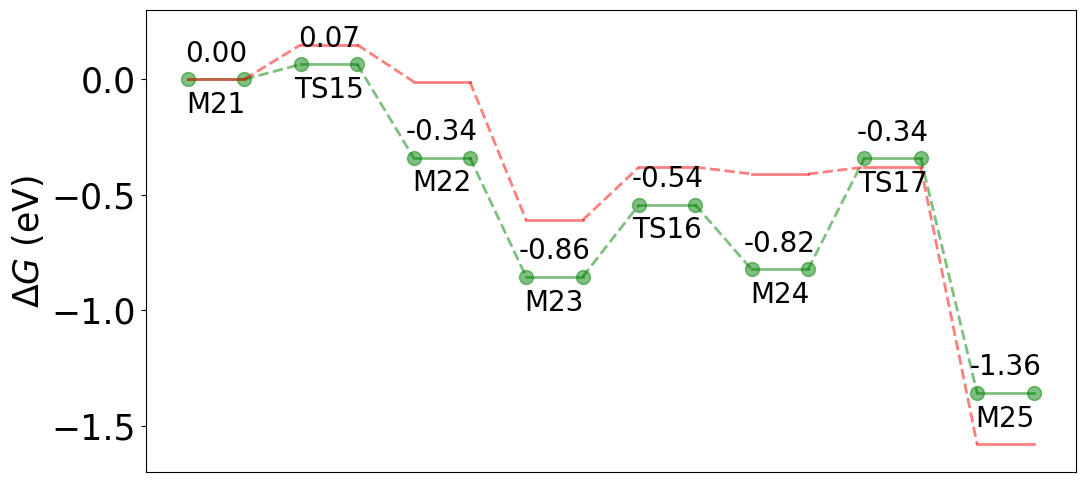

In [13]:
update_Gibbs_combo(Gibbs_dict, mol_1 = 'TS17', mol_2 = 'LiF')
update_Gibbs_combo(Gibbs_dict, mol_1 = 'M25', mol_2 = 'LiF')


fig = plt.figure(figsize=(12, 6))

compound_list = ['M21', 'TS15', 'M22', 'M23', 'TS16', 'M24', 'TS17+LiF', 'M25+LiF'] # 'M12+LiF', 'M13+LiF+LiF']
get_reaction_plot(compound_list, x_shift= 0, y_shift= 0, color= 'green', alpha = 0.5)

get_ref_plot(compound_list, 
             ref_Gibbs_list= [0, 0.15, -0.01, -0.61, -0.38, -0.41, -0.38, -1.58],
             x_shift= 0, y_shift= 0, color= 'red',  marker= '', alpha = 0.5)


plt.xticks([])
plt.ylim(-1.7, 0.3)
plt.ylabel(r'$\Delta G$ (eV)')


[-26871.82552218801, -26871.387608865356, -26871.547353792503, -26871.63553145596, -26871.272659020902, -26871.392444518355]


Text(0, 0.5, '$\\Delta G$ (eV)')

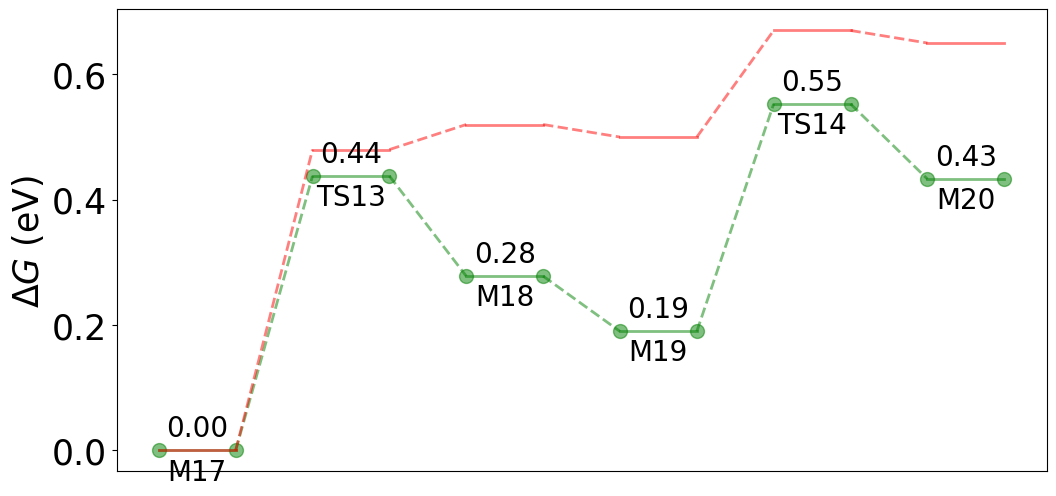

In [14]:
update_Gibbs_combo(Gibbs_dict, mol_1 = 'TS17', mol_2 = 'LiF')
update_Gibbs_combo(Gibbs_dict, mol_1 = 'M25', mol_2 = 'LiF')


fig = plt.figure(figsize=(12, 6))

compound_list = ['M17', 'TS13', 'M18', 'M19', 'TS14', 'M20'] # 'M12+LiF', 'M13+LiF+LiF']
get_reaction_plot(compound_list, x_shift= 0, y_shift= 0, color= 'green', alpha = 0.5, distance = 0.012)

get_ref_plot(compound_list, 
             ref_Gibbs_list= [0, 0.48, 0.52, 0.50, 0.67, 0.65], #
             x_shift= 0, y_shift= 0, color= 'red',  marker= '', alpha = 0.5)


plt.xticks([])
plt.ylabel(r'$\Delta G$ (eV)')
# plt.ylim(-1.7, 0.3)

[-41684.24352681339, -41683.71140136773, -41684.12339943122, -41683.15531572762, -41683.21789460167, -41682.809117316654, -41683.90301274094]


(-0.2, 2.0)

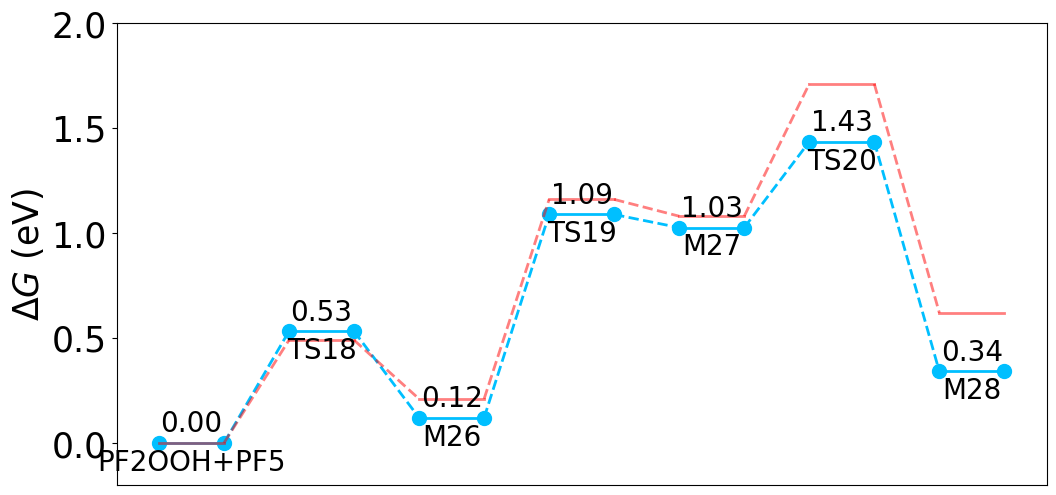

In [24]:
update_Gibbs_combo(Gibbs_dict, mol_1 = 'PF2OOH', mol_2 = 'PF5')


fig = plt.figure(figsize=(12, 6))

compound_list = ['PF2OOH+PF5', 'TS18', 'M26', 'TS19', 'M27', 'TS20', 'M28'] # 'M12+LiF', 'M13+LiF+LiF']
get_reaction_plot(compound_list, x_shift= 0, y_shift= 0, color= 'deepskyblue', alpha = 1, distance = 0.025)

get_ref_plot(compound_list, 
             ref_Gibbs_list= [0, 0.49, 0.21, 1.16, 1.08, 1.71, 0.62], #
             x_shift= 0, y_shift= 0, color= 'red',  marker= '', alpha = 0.5)


plt.xticks([])
plt.ylabel(r'$\Delta G$ (eV)')
plt.ylim(-0.2, 2.0)

[-41875.6371716774, -41875.233258918524, -41876.211253100424, -41875.99739024036, -41874.617246577094, -41874.960290764495, -41875.09249235216, -41874.74592770779, -41875.2521762592, -41874.550741333755, -41875.13583480352]


Text(0, 0.5, '$\\Delta G$ (eV)')

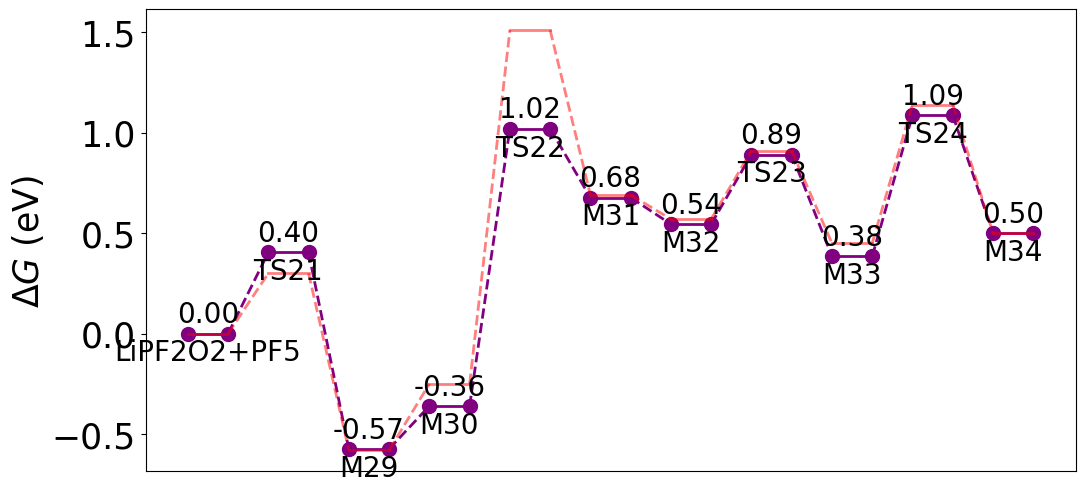

In [27]:
update_Gibbs_combo(Gibbs_dict, mol_1 = 'LiPF2O2', mol_2 = 'PF5')


fig = plt.figure(figsize=(12, 6))

compound_list = ['LiPF2O2+PF5', 'TS21', 'M29', 'M30', 'TS22', 'M31', 'M32', 'TS23', 'M33', 'TS24', 'M34'] 
get_reaction_plot(compound_list, x_shift= 0, y_shift= 0, color= 'purple', alpha = 1, distance = 0.025)

get_ref_plot(compound_list, 
             ref_Gibbs_list= [0, 0.30, -0.58, -0.25, 1.51, 0.69, 0.57, 0.91, 0.45, 1.14, 0.50], #
             x_shift= 0, y_shift= 0, color= 'red',  marker= '', alpha = 0.5)


plt.xticks([])
plt.ylabel(r'$\Delta G$ (eV)')
# plt.ylim(-0.2, 2.0)